In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
class XOR:
    def __init__(self, x,y):
        self.out = x ^ y
    
class AND:
    def __init__(self, x,y):
        self.out = x * y 
    
class OR:
    def __init__(self, x,y):
        self.out = x or y

class buffer:
    def __init__(self, x):
        self.out = x

In [17]:
a = 1
b = 1
c = 0

xor1 = XOR(a,b)
xor2 = XOR(xor1.out,c)
s = xor2.out

and1 = AND(a,b)
and2 = AND(c, xor1.out)

c_out = OR(and1.out, and2.out).out

In [19]:
c_out, s

(1, 0)

In [57]:
def clock_gen(t_total=10):
    t = []
    t.append(1)
    for i in range(2,t_total+1):
        t = t +  [i,i]
    clk = []
    clk.append(0)
    for i in range(2, t_total+1):
        clk = clk + [[0,1],[1,0]][i%2]

    return t, clk

In [58]:
t, clk = clock_gen(10)

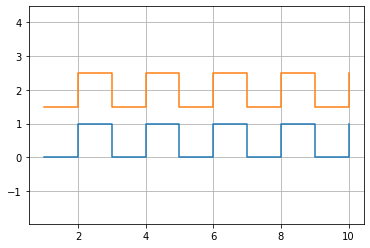

In [66]:
plt.plot(t,clk)
plt.plot(t,np.array(clk)+1.5)

plt.axis('equal')
plt.grid()


# Other Approach

In [104]:
[0] * edge[0]

[0, 0]

In [234]:
class Signal:
    def __init__(self, edge, first_edge, t_end):
        self.rise = [0,1]
        self.fall = [1,0]
        self.trans = [self.rise, self.fall]
        
        if first_edge == 'rise':
            self.initial_level = 0
        else:
            self.initial_level = 1
            
        self.edge = edge
        self.t_end = t_end
        self.first_edge = first_edge
        
    def generate(self):
        
        self.t = [1]*2*len(self.edge)
        self.t[0:-1:2] = self.edge
        self.t[1::2] = self.edge

        self.clk = []

        if self.first_edge == 'rise':
            init = 0
        else:
            init = 1

        for i in range(len(self.edge)):
            self.clk += self.trans[(i+init)%2]
            
        if len(edge)%2 == 0 :
            level_end = self.initial_level
            
        else:
            level_end = int( not(self.initial_level))
            

        return np.array([0]*self.edge[0] + self.t + [self.t_end]), np.array([self.initial_level]*edge[0] + self.clk + [level_end])
        
    def get_val(self,T_list):
        result = []
        for T in T_list:
            edge = np.array(self.edge)
            if np.argmin(T > edge) % 2 ==1:
                result.append (int(not(self.initial_level)))
            else:
                result.append(self.initial_level)
                
        return np.array(result)

In [235]:
edge = [2,3,3.3,3.4,4,6,7,10,12,14]
t_end = 15
first_edge = 'rise'
a1 = Signal(edge, first_edge, t_end)
result1 = a1.generate()

In [236]:
edge = [1,3,4,5,8,12]
t_end = 15
first_edge = 'rise'
a2 = Signal(edge, first_edge, t_end)
result2 = a2.generate()

In [267]:
t_span = np.arange(0,15,0.01)
result = a1.get_val(t_span) * a2.get_val(t_span)

([], <a list of 0 Text yticklabel objects>)

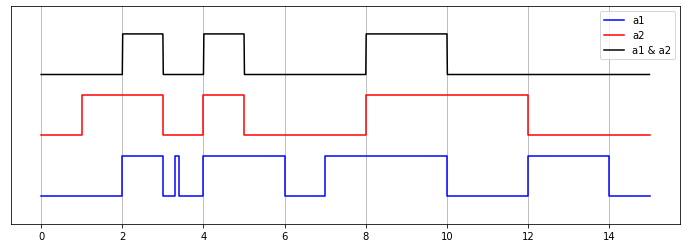

In [268]:
plt.figure(figsize=(12,4))
plt.plot(*result1, 'b', label='a1')
plt.plot(result2[0], result2[1]+1.5,'r', label='a2')
plt.plot(t_span, result + 3 ,'k', label='a1 & a2')
plt.axis('equal')
plt.grid()
plt.legend()
plt.yticks([])